In [1]:
##PREPARAMOS LIBRERIAS Y EL ENTORNO DE TRABAJO

from cleaning import *

import re
import pandas as pd
import numpy as np
import pylab as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

Index(['Case Number', 'Date', 'Year', 'Type', 'Country', 'Area', 'Location',
       'Activity', 'Name', 'Sex ', 'Age', 'Injury', 'Fatal (Y/N)', 'Time',
       'Species ', 'Investigator or Source', 'pdf', 'href formula', 'href',
       'Case Number.1', 'Case Number.2', 'original order', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')


In [2]:
##IMPORTAMOS EL ARCHIVO Y HACEMOS UNA COPIA PARA TRABAJAR

shark_orin=pd.read_csv('attacks.csv', encoding= 'latin1')

shark=shark_orin.copy()

In [3]:
##EXPLORAMOS EL ARCHIVO

shape_original=shark.shape  ##Guardamos el tamaño original en una variable

shark.columns  ##Vemos el nombre de las columnas

shark.head()  ##Echamos un vistazo al csv

shark.dtypes  ##Vemos los tipos de datos

shark.info(memory_usage='deep')  #Vemos los tipos de datos y los no nulos

shark.describe(include='all').T #Vemos la descripcion de la tabla de forma estadistica

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25723 entries, 0 to 25722
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Case Number             8702 non-null   object 
 1   Date                    6302 non-null   object 
 2   Year                    6300 non-null   float64
 3   Type                    6298 non-null   object 
 4   Country                 6252 non-null   object 
 5   Area                    5847 non-null   object 
 6   Location                5762 non-null   object 
 7   Activity                5758 non-null   object 
 8   Name                    6092 non-null   object 
 9   Sex                     5737 non-null   object 
 10  Age                     3471 non-null   object 
 11  Injury                  6274 non-null   object 
 12  Fatal (Y/N)             5763 non-null   object 
 13  Time                    2948 non-null   object 
 14  Species                 3464 non-null 

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Case Number,8702,6287,0,2400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,6302,5433,1957,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,6300.0,NaN,NaN,NaN,1927.272381,281.116308,0.0,1942.0,1977.0,2005.0,2018.0
Type,6298,8,Unprovoked,4595,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Country,6252,212,USA,2229,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Area,5847,825,Florida,1037,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,5762,4108,"New Smyrna Beach, Volusia County",163,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Activity,5758,1532,Surfing,971,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Name,6092,5230,male,550,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sex,5737,6,M,5094,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
##COMENZAR A GESTIONAR EL FICHERO

In [5]:
##Vamos a poner los nombres sin espacios y en minusculas

shark_columns=DataCleaning.modificar_nombres_columnas(shark)

shark.columns=shark_columns

In [6]:
#Primero vamos a eliminar las columnas de unnamed ya que no nos dan informacion
shark.drop(columns=['unnamed:22', 'unnamed:23'], inplace=True)

In [7]:
#Vamos a limpiar los duplicados
shark.drop_duplicates(inplace=True)

In [8]:
#nuevo shape (6311, 22)
shark.shape

(6312, 22)

In [9]:
##COLUMNA DATE
#Creamos nueva copia
sharkv2=shark.copy()

#limpiamos los nulos tomando la decision de completar las ultimas columnas
# con la misma fecha que al anterior ya que siguen un orden
sharkv2.date
sharkv2.date.isna().sum()  #hay 10
sharkv2.date.ffill(inplace=True)
sharkv2.date.isna().sum()


0

In [10]:
#Vemos los valores unicos

sharkv2.date.nunique()

sharkv2[sharkv2.date=='UNKWNOW']

sharkv2.date.value_counts()



#hay 5434

1845-1853                                                           11
1957                                                                11
1942                                                                 9
1956                                                                 8
1958                                                                 7
1950                                                                 7
1941                                                                 7
No date                                                              6
1949                                                                 6
1955                                                                 5
Aug-1956                                                             5
1959                                                                 5
Oct-1960                                                             5
28-Jul-1995                                                          5
1954  

In [11]:
#Pasamos una función para limpiar y dejar solamente los años
def date(x):
    x=str(x).lower().strip()
    key='(\d{4}$)'
    fecha=re.findall(key,x)
    
    
    
    if re.findall(key,x):
        return "".join(fecha)
    else:
        return '0'


    
    
    

sharkv2.date=sharkv2.date.apply(date)

sharkv2.date.head()

sharkv2.date.nunique()

sharkv2.date

sharkv2.date.unique()


#Tras pasar la función nos quedan 249


array(['2018', '2017', '0', '2016', '2015', '2014', '2013', '2012',
       '2011', '2008', '2010', '2009', '2006', '2007', '2005', '2004',
       '2003', '2002', '2001', '2000', '1999', '1998', '1997', '1996',
       '1995', '1984', '1994', '1993', '1992', '1991', '1990', '1989',
       '1988', '1987', '1986', '1985', '1983', '1982', '1981', '1980',
       '1979', '1978', '1977', '1976', '1975', '1974', '1973', '1972',
       '1971', '1970', '1969', '1968', '1967', '1966', '1965', '1964',
       '1954', '1963', '1962', '1961', '1960', '1959', '1764', '1958',
       '1957', '1956', '1955', '9955', '1953', '1952', '1951', '1950',
       '1949', '1948', '1848', '1947', '1946', '1945', '1944', '1943',
       '1942', '1941', '1940', '1939', '1938', '1937', '1936', '1935',
       '1934', '1933', '1932', '1931', '1930', '1929', '1928', '1927',
       '1926', '1925', '1924', '1923', '1922', '1921', '1920', '1919',
       '1918', '1917', '1916', '1915', '1914', '1913', '1912', '1911',
       '1

In [12]:
shark.date.unique()

array(['25-Jun-2018', '18-Jun-2018', '09-Jun-2018', ..., '1883-1889',
       '1845-1853', nan], dtype=object)

In [13]:
sharkv2.date.head()

0    2018
1    2018
2    2018
3    2018
4    2018
Name: date, dtype: object

In [14]:
##COLUMNA CASENUMBER

sharkv2.casenumber[(shark.casenumber.notna()) & (shark.casenumber!='0')]

sharkv2.casenumber.nunique()  ##tenemos 6287 valores únicos

sharkv2.casenumber.isna().sum()  #tenemos dos valores nulos que limpiamos

sharkv2.casenumber.fillna(value='unkwnow', inplace=True)

sharkv2.casenumber.isna().sum()

0

In [15]:
#Hacemos una funcion que sustituye las fechas extrañas por 0000.00.00 para poder pasar luego
def limpiar_fecha(x):
    x=str(x)
    contador=0
    
    num=re.findall('\d+.\d+.\d+', x)
    num="".join(num)
    
    if num=='':
        contador=0
    elif num in x:
        contador+=1

    if contador==1:
        return str(num)
    elif contador==0:
        return '0000.00.00'
    
sharkv2.casenumber=sharkv2.casenumber.apply(limpiar_fecha)



In [16]:
sharkv2.casenumber.nunique()  #Ahora tenemos valores unicos 5209 le hemos bajado casi 1000

sharkv2.casenumber.value_counts().head()

sharkv2.casenumber.sort_values(ascending=False)  #Dejamos colocadas las fechas

#Modificamos las columnas de casenumber que son practicamente iguales como esta

sharkv2['casenumber.1']=sharkv2.casenumber
sharkv2['casenumber.2']=sharkv2.casenumber



In [17]:
##COLUMNA AGE

#Primero limpiamos los nulos que hay más de 2000
sharkv2.age.isna().sum()

sharkv2.age.fillna(value='unkwnow', inplace=True)

sharkv2.age.nunique()  #contamos los valores únicos que son 157

sharkv2.age.value_counts().head()

unkwnow    2841
17          154
18          150
19          142
20          141
Name: age, dtype: int64

In [18]:
#Creamos una funcion para limpiar la edad

from statistics import mean
def edad(x):
    x = str(x).lower()
    num=re.findall('\d+', x)[:5]
    res = [eval(i) for i in num]
    if num:
        return mean(res)
    elif "teen" in x:
        return 15.5
    elif "young" in x:
        return 18.5
    elif "adult" in x:
        return 49
    elif "elderly" in x:
        return 70
    elif "middle" in x :
        return 50
    elif "18months" in x:
        return 1.5
    elif "9months" in x:
        return 0.75
    elif "2to3months" in x:
        return 0.2
    else:
        return 0
    
sharkv2.age=sharkv2.age.apply(edad)

    


In [19]:

sharkv2.age.nunique()  #Hemos pasado de 157 valores unicos a 82

sharkv2.age.value_counts().head()

0.0     2849
17.0     155
20.0     152
18.0     151
19.0     145
Name: age, dtype: int64

In [20]:
#COLUMNA TYPE
sharkv2.type.value_counts()

sharkv2.type.nunique()   #Hay 8 valores únicos

8

In [21]:
sharkv2.type.isna().sum()  #Hay 14 valores nulos que quitamos

sharkv2.type.fillna(value='unkwnow', inplace=True)

In [22]:
#Quitando los valores Boat y Boatomg por Boat

def tipo_ataque(x):
    if x =='Boating':
        return'Boat'
    elif x =='Boatomg':
        return'Boat'
    else:
        return x
    
sharkv2.type=sharkv2.type.apply(tipo_ataque)

In [23]:
sharkv2.type.value_counts()

sharkv2.type.nunique()  #En este caso no hemos reducido mucho los valores hemos pasado a 7


7

In [24]:
##COLUMNA YEAR

sharkv2.year.isna().sum()  #hay 12 valores nulos que los modificamos

sharkv2.year.fillna(value='unkwnow', inplace=True)


In [25]:
sharkv2.year.head()

sharkv2[['date','year']].head()

,date,year
0,2018,2018.0
1,2018,2018.0
2,2018,2018.0
3,2018,2018.0
4,2018,2018.0


In [26]:
#Pasamos una función y limpiamos year

def limpiaryear(x):
    x=str(x)
    
    key='(^\d{4})'
    year=re.findall(key,x)
    if x=='unkwnow':
        return 'unkwnow'
    elif re.findall(key,x):
        return "".join(year)
    else:
        return 'unkwnow'
    
sharkv3=sharkv2.copy()

sharkv3.year=sharkv3.year.apply(limpiaryear)



In [27]:
##COLUMNA COUNTRY

#En este caso hacemos un mantenimiento básico ya que hay ataques de tiburones que ni si 
# quiera se pueden asociar a un pais

#Limpiamos los nan

sharkv3.country.isna().sum()  ##hay 60 casos
sharkv3.country.fillna(value='unkwnow', inplace=True)

#contamos los valores unicos
sharkv3.country.value_counts()
sharkv3.country.nunique()  #Salen 213 valores


213

In [28]:
#Ponemos todo en mayusculas y quitamos los interrogantes

sharkv3.country=sharkv3.country.str.upper()

sharkv3.country=sharkv3.country.str.replace("?","")



In [29]:
#COLUMNA AREA
#Hacemos un poco lo mismo que con COUNTRY
#Primero los nulos
sharkv3.area.isna().sum()  #hay 465
sharkv3.area.fillna(value='unkwnow', inplace=True)



In [30]:
##En este caso vamos a gestionar dos valores que aparecen con caracteres extraños nada más de forma 
#dirercta ya que es complicado establecer regiones geográficas al haber ataques en alta mar
#'d\x92Étang-Salé'
#'Vava\x92u'

sharkv3.area.iloc[2356]='Vavau'
sharkv3.area.iloc[2362]='Vavau'
sharkv3.area.iloc[2515]='Vavau'

sharkv3.area.iloc[447]='dÉtang-Salé'
sharkv3.area.iloc[607]='dÉtang-Salé'


In [31]:
##COLUMNA LOCATION
#La gestionamos como las otras dos geográficas
sharkv3.location.isna().sum()  #hay 550
sharkv3.location.fillna(value='unkwnow', inplace=True)


In [32]:
##COLUMNA ACTIVITY
#Vemos si tiene nulos y los limpiamos

sharkv3.activity.isna().sum()  #tiene 554
sharkv3.activity.fillna(value='unkwnow', inplace=True)



In [33]:
#Cogemos cierto patron de actividades y lo pasamos por una función para que cambie los nombres,
# el resto los consideramos como otros

In [34]:
def actividad(x):
    dicc_actividades = {"Fishing":re.search(".*[Ff](ishing|ISHING).*",str(x)),
                    "Swimming":re.search(".*[Ss](wimming|WIMMing).*",str(x)),
                    "Kite":re.search(".*[Kk](ite|ITE).*",str(x)),
                    "Walking":re.search(".*[Ww](alking|ALKING).*",str(x)),
                    "Boogie Board":re.search(".*[Bb](oogie|OOGIE).*",str(x)),
                    "Body Boarding":re.search(".*[Bb](ody|ODY).*",str(x)),
                    "Wind Surfing":re.search(".*[wW](ind|IND).*",str(x)),
                    "Boat":re.search(".*[Bb](oat|OAT).*",str(x)),
                    "Interact with sharks":re.search(".*[Ss](hark|HARK).*",str(x)),
                    "Diving":re.search(".*[Dd](iving|IVING).*",str(x)),
                    "Standing in water":re.search(".*[Ss](tand|TAND).*",str(x)),
                    "Paddling":re.search(".*[Pp](addl|ADDL).*",str(x)),
                    "Bathing":re.search(".*[Bb](athing|ATHING).*",str(x)),
                    "OverBoard":re.search(".*[Oo](verb|VERB).*",str(x)),
                    "Bathing":re.search(".*[Bb](athing|ATHING).*",str(x)),
                    "Floating":re.search(".*[Ff](loat|LOAT).*",str(x)),
                    "Jumping":re.search(".*[Jj](ump|UMP).*",str(x))}
    for key,values in dicc_actividades.items():
        if values:
            return key
    return "other"

sharkv3.activity=sharkv3.activity.apply(actividad)

In [35]:
sharkv2.activity.nunique()  #habian 1532
sharkv3.activity.nunique()  #quedan 17 actividades

17

In [36]:
##COLUMNA NAME
#Como siempre limpiamos nulos
sharkv3.name.isna().sum()  ##220
sharkv3.name.fillna(value='unkwnow', inplace=True)

sharkv3.name.nunique()  #5231


5231

In [37]:
#Esta columna no tiene mucha relevancia para los estudios pero intetamos limpiarla de la mejor forma posible
def name(x):
    x=x.lower()
    
    if re.findall('male',x):
        return 'unkonwn'
    elif x=='':
        return 'unkonwn'
    elif x==None:
        return 'unkonwn'
    elif 'marine' in x:
        return 'unkonwn'
    elif  'girl' in x:
        return 'unkonwn'
    elif 'boy' in x:
        return 'unkonwn'
    elif '_' in x:
        return 'unkonwn'
    elif '..' in x:
        return 'unkonwn'
    elif 'people' in x:
        return 'unkonwn'
    elif 'teacher' in x:
        return 'unkonwn'
    elif x=='':
        return 'unkonwn'
    elif 'citizen' in x:
        return 'unkonwn'
    elif '*' in x:
        return 'unkonwn'
    elif 'anonymus' in x:
        return 'unkonwn'
    elif 'japanese' in x:
        return 'unkonwn'
    elif re.findall('^\d+', x):
        return 'unkonwn'
    else:
        return x
    
sharkv3.name=sharkv3.name.apply(name)

In [38]:
sharkv3.name.nunique()  #4863... unos 400 menos

4863

In [39]:
##COLUMNA SEX
#limpiamos los nulos
sharkv3.sex.isna().sum()  #575
sharkv3.sex.fillna(value='unkwnow', inplace=True)
sharkv3.sex.isna().sum()


0

In [40]:
#Al ser poco los valores erroneos los modificamos directamente

sharkv3.sex[sharkv3.sex=='M ']='M'
sharkv3.sex[sharkv3.sex=='N']='M'
sharkv3.sex[sharkv3.sex=='.']='unkwnow'
sharkv3.sex[sharkv3.sex=='lli']='unkwnow'



In [41]:
sharkv2.sex.nunique()  #6
sharkv3.sex.unique()  #3


array(['F', 'M', 'unkwnow'], dtype=object)

In [42]:
##COLUMNA INJURY
#Limpiamos nulos
sharkv3.injury.isna().sum()  #38
sharkv3.injury.fillna(value='unkwnow', inplace=True)



In [43]:
sharkv3.injury.nunique()  #3734

sharkv3.injury.head()


0    No injury to occupant, outrigger canoe and pad...
1                           Minor injury to left thigh
2         Injury to left lower leg from surfboard skeg
3                            Minor injury to lower leg
4    Lacerations to leg & hand shark PROVOKED INCIDENT
Name: injury, dtype: object

In [44]:
#Tomo la decisión de si hay un texto escrito y no han puesto fatal lo tomo como no mortal y se modifica

sharkv4=sharkv3.copy()
def injury(x):
    
    x=str(x.lower())
    if "fatal" in x:
        return 'fatal'
    elif "No injury" or 'no injury' in x:
        return 'no injury'
    elif 'injury' in x:
        return 'injury'
    elif 'unkwnow' in x:
        return 'unkwnow'
    else:
        return 'injury'
    
sharkv4.injury=sharkv4.injury.apply(injury)

In [45]:
sharkv4.injury.nunique()  #lo reducimos a 2 valores INJURY O FATAL

2

In [46]:
##COLUMNA FATAL
#En este caso primero igualamos donde hay algun dato en injury ponemos N en fatal
sharkv4['fatal(y/n)'][sharkv4.injury=='injury']='N'

In [47]:
#Luego limpiamos los nulos
sharkv4['fatal(y/n)'].isna().sum()  #no hay nulos

549

In [48]:
sharkv4['fatal(y/n)'].unique()

array(['N', 'Y', nan, 'M', 'UNKNOWN', '2017', ' N', 'N ', 'y'],
      dtype=object)

In [49]:
#Al tener que modificar en pocos casos los hacemos directamente

sharkv4['fatal(y/n)'][sharkv4['fatal(y/n)']=='UNKNOWN']='UNKWNOW'
sharkv4['fatal(y/n)'][sharkv4['fatal(y/n)']=='M']='N'
sharkv4['fatal(y/n)'][sharkv4['fatal(y/n)']=='2017']='UNKWNOW'


sharkv4['fatal(y/n)']=sharkv4['fatal(y/n)'].str.upper()



sharkv4['fatal(y/n)']=sharkv4['fatal(y/n)'].str.strip()

sharkv4['fatal(y/n)'].value_counts()



N          4302
Y          1389
UNKWNOW      72
Name: fatal(y/n), dtype: int64

In [50]:
#COLUMNA TIME
#gestionamos los nulos
sharkv4.time.isna().sum()  #3296
sharkv4.time.fillna(value='unkwnow', inplace=True)
sharkv4.time.isna().sum()


0

In [51]:
#limpiamos la columna primero generamos una funcion para quitarlos fallos principales

def time(x):
    
    x=str(x.lower())
    
    hora=re.findall('\d+[a-z]\d+',x)
    
    if x=='unkwnow':
        return '00:00'
    elif re.findall('\d+[a-z]\d+',x):
        return "".join(hora[0])
    elif 'morning' in x:
        return '10:00'
    elif 'midday' in x:
        return '12:00'
    elif 'midnight' in x:
        return '24:00'
    elif 'afternoon' or 'after noon' in x:
        return '17:00'
    elif 'evening'  in x:
        return '19:00'
    elif 'night' in x:
        return '21:00'
    else:
        return x
    
sharkv4.time=sharkv4.time.apply(time)

In [52]:
sharkv3.time.nunique()  #368
sharkv4.time.nunique()  #254
sharkv4.time.value_counts().head()

00:00    3364
17:00     425
10:00     137
11h00     131
12h00     113
Name: time, dtype: int64

In [53]:
#Hacemos otra función para igualar los datos con dos puntos y dejamos el resto de datos como 'unkwnow

def dospunto(x):
    hora=""
    
    if x=='unkwnow':
        return 'unkwnow'
    
    elif len(x)<3:
        return 'unkwnow'
    
    elif len(x)>6:
        if "am" or "a.m." or 'pm' or 'p.m.':
            x.replace('am','')
            x.replace('a.m.','')
            x.replace('pm','')
            x.replace('p.m.','')
            
    elif len(x)>10:
        return 'unkwnow'
    
    elif len(x)==4:
        for n in range(len(x)):
            if n==2:
                hora+=':'+x[n]
            else:
                hora+=x[n]
        return hora
    
    elif len(x)==5:
        
        for num in x:
            
            if num  in '1,2,3,4,5,6,7,8,9,0':
                hora+=num
                
        
            elif num not in '1,2,3,4,5,6,7,8,9,0':
                hora+=':'
                
        
    else:
        return x
    
    return hora

sharkv4.time=sharkv4.time.apply(dospunto)

In [54]:
sharkv4.time.nunique()  #249

sharkv4.time.head()

sharkv4.time.value_counts()

00:00     3364
17:00      502
10:00      199
11:00      131
12:00      124
15:00      110
16:00      101
14:00      100
16:30       75
14:30       75
13:00       73
17:30       71
18:00       69
15:30       66
11:30       62
13:30       60
09:00       53
10:30       51
09:30       38
12:30       36
18:30       34
07:30       34
08:00       33
19:00       26
08:30       26
07:00       24
15:45       18
17:15       18
13:20       17
14:45       17
06:00       17
16:45       16
11:45       15
11:15       15
10:45       14
20:00       13
08:45       13
09:45       12
20:30       12
19:30       12
13:45       12
15:15       12
10:15       12
16:15       11
16:20       10
12:45       10
12:15       10
10:55        9
06:30        8
17:45        8
11:10        8
13:15        8
06:45        8
14:10        8
14:20        8
15:20        7
18:15        7
18:45        7
10:20        7
24:00        6
07:45        6
04:00        6
03:00        6
09:15        6
14:40        6
05:00        6
11:20     

In [55]:
##COLUMNA INVESTIGATOR OR SOURCE
#Simplemente limpiamos duplicados no es una columna que nos interese

sharkv4.investigatororsource.isna().sum()  ##26

sharkv4.investigatororsource.fillna(value='unkwnow', inplace=True)

sharkv4.investigatororsource.isna().sum()

0

In [56]:
##COLUMNA SPECIES
#Limpiamos los nulos

sharkv4.species.isna().sum()  #2793

sharkv4.species.fillna(value='unkwnow', inplace=True)

sharkv4.species.isna().sum() 

0

In [57]:
#Pasamos una primera funcion para dejar solo las palabras con shark y la que hay delante

sharkv5=sharkv4.copy()

def species(x):
    
    x=str(x.lower())
    keyw='([a-zA-Z]+\sshark)'
    
    shark=re.findall(keyw,x)
    
    if re.findall(keyw,x):
        return "".join(shark)
    else:
        return 'unkwnow'
    
sharkv5.species=sharkv5.species.apply(species)

In [58]:
sharkv4.species.nunique()  #1544
sharkv5.species.nunique() #133
sharkv5.species.value_counts().head()

unkwnow        4118
white shark     622
tiger shark     258
bull shark      170
m shark         137
Name: species, dtype: int64

In [59]:
#Pasamos una nueva función que quite los casos con dos letras delante de shark

def species2(x):
    
    x=str(x.lower())
    
    
    keyw='([a-zA-Z]{1,2}\sshark)'
    
    shark=re.findall(keyw,x)
    
    if x in re.findall(keyw,x):
        return 'unkwnow'
    else:
        return x
    
sharkv5.species=sharkv5.species.apply(species2)

sharkv5.species.nunique()  #126

sharkv5.species.value_counts().head()



unkwnow        4319
white shark     622
tiger shark     258
bull shark      170
nurse shark      96
Name: species, dtype: int64

In [60]:
##LAS COLUMNAS PDF, HREF,HREF_FORMULA Y ORIGINAL NUMBER 
#Solo limpiamos los null ya que no las vamos a usar
sharkv5.pdf.isna().sum()

sharkv5.pdf.fillna(value='unkwnow', inplace=True)

sharkv5.href.isna().sum()

sharkv5.href.fillna(value='unkwnow', inplace=True)

sharkv5.hrefformula.isna().sum()

sharkv5.hrefformula.fillna(value='unkwnow', inplace=True)

sharkv5.originalorder.isna().sum()

sharkv5.originalorder.fillna(value='unkwnow', inplace=True)

In [61]:
##Volvemos a mirar si hay duplicados

sharkv5.shape  #6312

sharkv5.drop_duplicates()

sharkv5.info(memory_usage='deep') #6312 por lo que no hay

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6312 entries, 0 to 25722
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   casenumber            6312 non-null   object 
 1   date                  6312 non-null   object 
 2   year                  6312 non-null   object 
 3   type                  6312 non-null   object 
 4   country               6312 non-null   object 
 5   area                  6312 non-null   object 
 6   location              6312 non-null   object 
 7   activity              6312 non-null   object 
 8   name                  6312 non-null   object 
 9   sex                   6312 non-null   object 
 10  age                   6312 non-null   float64
 11  injury                6312 non-null   object 
 12  fatal(y/n)            5763 non-null   object 
 13  time                  6312 non-null   object 
 14  species               6312 non-null   object 
 15  investigatororsource

In [62]:
#Buscamos constantes no numéricas
DataCleaning.get_constantes_nonum(sharkv5) #como resultado da 0
#Buscamos constantes numéricas
DataCleaning.get_constantes_num(sharkv5) #como resultado da 0
#Buscamos columnas con baja varianza
DataCleaning.get_bajavarianza(sharkv5) #como resultado da 0



[]

In [63]:
#Vamos a sacar los outliers por la columna de data, por lo tanto por año para ello vamos a convertir
#la columna en un dato numérico

sharkv5.date.nunique()  #243

sharkv6=sharkv5.copy()

sharkv6.date.unique()

sharkv6.date=pd.to_numeric(sharkv6.date)




<AxesSubplot:>

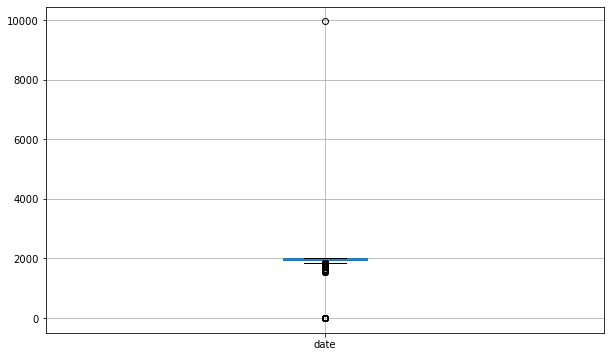

In [64]:
#Sacamos el boxplot para ver gráficamente la distribución de datos. El que habíamos dejado como 0 
# al no tener nada sabemos que se iba a ir en los mismos

plt.figure(figsize=(10, 6))

sharkv6.boxplot(column=['date'])

In [65]:
##Generamoos la columna IQR
stats=sharkv6.describe().T

stats['IQR']=stats['75%']-stats['25%']

stats


,count,mean,std,min,25%,50%,75%,max,IQR
date,6312.0,1946.076521,235.573995,0.0,1942.0,1977.0,2005.0,9955.0,63.0
age,6312.0,14.974509,17.042206,0.0,0.0,13.0,25.0,87.0,25.0


In [66]:
stats.index

Index(['date', 'age'], dtype='object')

In [67]:
outliers=pd.DataFrame(columns=stats.index)
threshold=1.5

for c in stats.index:

    iqr=stats.at[c, 'IQR']

    cutoff=threshold * iqr  # test tukey

    lower=stats.at[c, '25%'] - cutoff
    print(lower)
    upper=stats.at[c, '75%'] + cutoff
    print(upper)

    res=sharkv6[(sharkv6[c] < lower) | (sharkv6[c] > upper)].copy()

    res['outliers']=c

    outliers=outliers.append(res, sort=True)

    
print( outliers)

#Los outliers nos indican que por fecha tenemos que quitar antes de 1846 y sobre el 2099. 
# Lo cual indica que alguna fecha es erronea y la vamos a quiyar por lo que año tope ponemos 2022

1847.5
2099.5
-37.5
62.5
                  activity   age                                  area  \
131                  other   0.0                             Marquesas   
1292                Diving   0.0                             Tokyo Bay   
1357                 other  36.0                                Hawaii   
1358                 other  15.0  Territory of Cocos (Keeling) Islands   
1462               Walking  11.0                               Florida   
1525               Fishing   0.0                       Loyalty Islands   
1655               Fishing   0.0                     Western Australia   
2459                 other   0.0                               unkwnow   
3080                 other   0.0                         Island of Kos   
3082               Fishing  20.0                                Ha'api   
3125                Diving   0.0                              Tasmania   
3215                Diving  24.0                               Florida   
3408         

In [68]:
sharkv7=sharkv6.copy()

sharkv7=sharkv7.query('date>1846 or date>2022')

In [69]:
sharkv7.shape  #el dataframe queda con 6121 filas sin exceder el minimo y 22 columnas. 



(6121, 22)

In [70]:
##Hacemos un downcasting de los tipos para ahorrar memoria

#Object

for c in sharkv7.select_dtypes('object').columns:
    
    sharkv7[c]=sharkv7[c].astype('category')
    


#numericos

for c in sharkv7.select_dtypes('integer').columns:
    
    sharkv7[c]=pd.to_numeric(sharkv7[c], downcast='integer')
    
sharkv7.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6121 entries, 0 to 25722
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   casenumber            6121 non-null   category
 1   date                  6121 non-null   int16   
 2   year                  6121 non-null   category
 3   type                  6121 non-null   category
 4   country               6121 non-null   category
 5   area                  6121 non-null   category
 6   location              6121 non-null   category
 7   activity              6121 non-null   category
 8   name                  6121 non-null   category
 9   sex                   6121 non-null   category
 10  age                   6121 non-null   float64 
 11  injury                6121 non-null   category
 12  fatal(y/n)            5594 non-null   category
 13  time                  6121 non-null   category
 14  species               6121 non-null   category
 15  inv

In [71]:
#Reseteamos los indices
sharkv7.reset_index(drop=True, inplace=True)

#Lo guardamos
sharkv7.to_csv('shark_final.csv', index=False)

In [72]:
#Para mi estudio si que voy a tener que eliminar más columnas que falsean el mismo ya que voy a sacar
# datos sobre actividad y species por lo que voy a eliminar todas las que sean unkwnow en species
sharkv8=sharkv7.copy()
sharkv8=sharkv7[sharkv7.species!='unkwnow'].drop(index=0)


sharkv8.shape



(1966, 22)

In [73]:
#CONCLUSIONES BUSCADAS

sharkv8.species.value_counts().head()
###Las especies que más atacan de los datos documentados donde se indica la especia son:
# white shark  614 
# tiger shark  254 
# bull shark   166

sharkv8.species[sharkv8.species=='white shark'].count()/sharkv8.activity.count()*100
#El white shark ha realizado el 31% de los ataques en las actividades descritas
sharkv8.species[sharkv8.species=='tiger shark'].count()/sharkv8.activity.count()*100
#El tiger shark ha realizado el 13% de los ataques en las actividades descritas
sharkv8.species[sharkv8.species=='bull shark'].count()/sharkv8.activity.count()*100
#El bull shark ha realizado el 8% de los ataques en las actividades descritas


###Cuántos ataques han sido fatales
sharkv8['fatal(y/n)'][sharkv8['fatal(y/n)']=='Y'].count()/sharkv8['fatal(y/n)'].count()*100
#Un 15% de los ataques han sido mortales


###Realizando que actividad se han dado más ataques
sharkv8.activity.value_counts()
##El top 4 de actividades cuando han atacado los tiburones son:
#Other                   701
#Fishing                 502
#Swimming                272
#Diving                  215

#De estas han sido ataques mortales:
sharkv8['fatal(y/n)'][(sharkv8['fatal(y/n)']=='Y') & ((sharkv8.activity=='other') | (sharkv8.activity=='Fishing')
                            | (sharkv8.activity=='Swimming') | (sharkv8.activity=='Diving'))].count()/sharkv8.activity[(sharkv8.activity=='Fishing')
                            | (sharkv8.activity=='Swimming') | (sharkv8.activity=='Diving') ].count()*100
#El 26% de los ataques en estas actividades


sharkv8.activity[(sharkv8.activity=='other') & (sharkv8['fatal(y/n)']=='Y')].count()/sharkv8.activity[sharkv8.activity=='other'].count()*100
sharkv8.species[(sharkv8.species=='white shark') & (sharkv8.activity=='other')].count()/sharkv8.activity[sharkv8.activity=='other'].count()*100
sharkv8.species[(sharkv8.species=='tiger shark') & (sharkv8.activity=='other')].count()/sharkv8.activity[sharkv8.activity=='other'].count()*100
sharkv8.species[(sharkv8.species=='bull shark') & (sharkv8.activity=='other')].count()/sharkv8.activity[sharkv8.activity=='other'].count()*100
#El 11% de los ataques en Other son mortales
#El 34% son realizados por white shark, 13% por tiger shark, el 8% por bull shark


sharkv8.activity[(sharkv8.activity=='Fishing') & (sharkv8['fatal(y/n)']=='Y')].count()/sharkv8.activity[sharkv8.activity=='Fishing'].count()*100
sharkv8['fatal(y/n)'][(sharkv8['fatal(y/n)']=='Y') & (sharkv8.activity=='other')].count()/sharkv8.activity[sharkv8.activity=='other'].count()*100
sharkv8.species[(sharkv8.species=='tiger shark') & (sharkv8.activity=='Fishing')].count()/sharkv8.activity[sharkv8.activity=='Fishing'].count()*100
sharkv8.species[(sharkv8.species=='bull shark') & (sharkv8.activity=='Fishing')].count()/sharkv8.activity[sharkv8.activity=='Fishing'].count()*100
#El 9% de los ataques en Fishing son mortales
#El 29% son realizados por white shark, 10% por tiger shark, el 8% por bull shark

sharkv8.activity[(sharkv8.activity=='Swimming') & (sharkv8['fatal(y/n)']=='Y')].count()/sharkv8.activity[sharkv8.activity=='Swimming'].count()*100
sharkv8.species[(sharkv8.species=='white shark') & (sharkv8.activity=='Swimming')].count()/sharkv8.activity[sharkv8.activity=='Swimming'].count()*100
sharkv8.species[(sharkv8.species=='tiger shark') & (sharkv8.activity=='Swimming')].count()/sharkv8.activity[sharkv8.activity=='Swimming'].count()*100
sharkv8.species[(sharkv8.species=='bull shark') & (sharkv8.activity=='Swimming')].count()/sharkv8.activity[sharkv8.activity=='Swimming'].count()*100

#El 36% de los ataques en Swimming son mortales
#El 24% son realizados por white shark, 14% por tiger shark, el 14% por bull shark

sharkv8.activity[(sharkv8.activity=='Diving') & (sharkv8['fatal(y/n)']=='Y')].count()/sharkv8.activity[sharkv8.activity=='Diving'].count()*100
sharkv8.species[(sharkv8.species=='white shark') & (sharkv8.activity=='Diving')].count()/sharkv8.activity[sharkv8.activity=='Diving'].count()*100
sharkv8.species[(sharkv8.species=='tiger shark') & (sharkv8.activity=='Diving')].count()/sharkv8.activity[sharkv8.activity=='Diving'].count()*100
sharkv8.species[(sharkv8.species=='bull shark') & (sharkv8.activity=='Diving')].count()/sharkv8.activity[sharkv8.activity=='Diving'].count()*100
#El 17% de los ataques en Diving son mortales
#El 40% son realizados por white shark, 13% por tiger shark, el 4% por bull shark






4.186046511627907

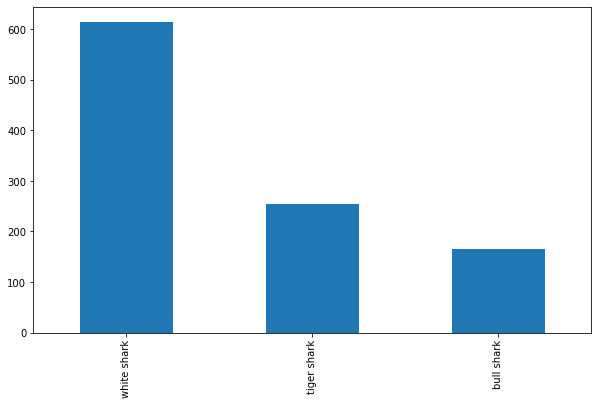

In [74]:
plt.figure(figsize=(10, 6))

sharkv8.species.value_counts().head(3).plot.bar();

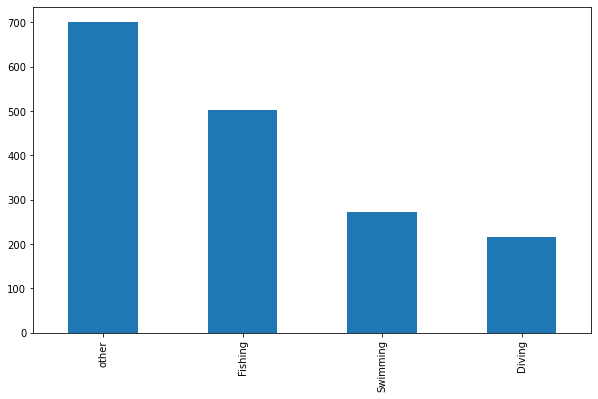

In [75]:
plt.figure(figsize=(10, 6))

sharkv8.activity.value_counts().head(4).plot.bar();